In [1]:
import pandas as pd

# 数据加载，并提取时间特征
def data_load():
    data = pd.read_csv('./user_balance_table.csv')
    data = add_timestamp(data)
    return data

# 给数据添加时间维度
def add_timestamp(data):
    # 时间维度解析
    data['report_date'] = pd.to_datetime(data['report_date'], format="%Y%m%d")
    # 添加时间维度
    data['day'] = data['report_date'].dt.day
    data['month'] = data['report_date'].dt.month
    data['year'] = data['report_date'].dt.year
    data['week'] = data['report_date'].dt.week
    data['weekday'] = data['report_date'].dt.weekday
    return data

data = data_load()
data

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,11,8,2014,33,0
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,14,8,2014,33,3
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,17,8,2014,33,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,...,61,NaN,NaN,NaN,NaN,25,8,2014,35,0
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,...,60,0.0,0.0,0.0,12500.0,31,8,2014,35,6
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,...,2297,NaN,NaN,NaN,NaN,24,7,2014,30,3
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,...,2298,NaN,NaN,NaN,NaN,27,7,2014,30,6


In [2]:
# 0代表0+1 周一，6代表6+1 周日
data['weekday'].value_counts()

6    410701
5    408824
4    407509
3    405907
2    404159
1    402536
0    400785
Name: weekday, dtype: int64

In [3]:
def get_total_balance(data, date):
    # 在内存中copy了一份
    df_temp = data.copy()
    # 按照report_date进行聚合
    df_temp = df_temp.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
    # 还原下report_date字段，重新索引
    df_temp.reset_index(inplace=True)
    # 筛选大于date的数据
    df_temp = df_temp[(df_temp['report_date'] >= date)].reset_index(drop=True)
    return df_temp

# 筛选稳定器的数据，即2014-03-01之后的数据
total_balance = get_total_balance(data, '2014-03-01')
total_balance

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,report_date,total_purchase_amt,total_redeem_amt
0,2014-03-01,362865580,211279011
1,2014-03-02,276202230,246199417
2,2014-03-03,505305862,513017360
3,2014-03-04,524146340,250562978
4,2014-03-05,454295491,209072753
...,...,...,...
179,2014-08-27,302194801,468164147
180,2014-08-28,245082751,297893861
181,2014-08-29,267554713,273756380
182,2014-08-30,199708772,196374134


In [4]:
import datetime
import numpy as np

# 生成测试数据
def generate_test_data(data):
    total_balance = data.copy()
    # 生成2014-09-01到2014-09-30的数据
    start = datetime.datetime(2014, 9, 1)
    end = datetime.datetime(2014, 10, 1)
    testdata = []
    while start != end:
        # 3个字段： date, total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        testdata.append(temp)
        # 日期+1
        start += datetime.timedelta(days=1)
    # 封装testdata
    testdata = pd.DataFrame(testdata)
    testdata.columns = total_balance.columns
    # 将testdata合并到total_balance中
    total_balance = pd.concat([total_balance, testdata], axis=0)
    return total_balance.reset_index(drop=True)

total_balance = generate_test_data(total_balance)
total_balance

,report_date,total_purchase_amt,total_redeem_amt
0,2014-03-01,362865580.0,211279011.0
1,2014-03-02,276202230.0,246199417.0
2,2014-03-03,505305862.0,513017360.0
3,2014-03-04,524146340.0,250562978.0
4,2014-03-05,454295491.0,209072753.0
...,...,...,...
209,2014-09-26,NaN,NaN
210,2014-09-27,NaN,NaN
211,2014-09-28,NaN,NaN
212,2014-09-29,NaN,NaN


In [5]:
# 对total_balance添加时间维度
total_balance = add_timestamp(total_balance)
total_balance

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
209,2014-09-26,NaN,NaN,26,9,2014,39,4
210,2014-09-27,NaN,NaN,27,9,2014,39,5
211,2014-09-28,NaN,NaN,28,9,2014,39,6
212,2014-09-29,NaN,NaN,29,9,2014,40,0


In [6]:
# total_balance的备份
temp = total_balance.copy()

In [7]:
month_index = 9
total_balance = temp.copy() # 选择2014年3月1日到8月31日的数据
total_balance = total_balance[['report_date', 'total_purchase_amt', 'total_redeem_amt']]
# 3月到目前的数据
total_balance = total_balance[(total_balance['report_date'] >= pd.to_datetime('2014-03-01')) & (total_balance['report_date'] < pd.to_datetime('2014-'+str(month_index)+'-01'))]
total_balance

,report_date,total_purchase_amt,total_redeem_amt
0,2014-03-01,362865580.0,211279011.0
1,2014-03-02,276202230.0,246199417.0
2,2014-03-03,505305862.0,513017360.0
3,2014-03-04,524146340.0,250562978.0
4,2014-03-05,454295491.0,209072753.0
...,...,...,...
179,2014-08-27,302194801.0,468164147.0
180,2014-08-28,245082751.0,297893861.0
181,2014-08-29,267554713.0,273756380.0
182,2014-08-30,199708772.0,196374134.0


In [8]:
# 对total_balance添加时间维度
total_balance = add_timestamp(total_balance)
total_balance

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
179,2014-08-27,302194801.0,468164147.0,27,8,2014,35,2
180,2014-08-28,245082751.0,297893861.0,28,8,2014,35,3
181,2014-08-29,267554713.0,273756380.0,29,8,2014,35,4
182,2014-08-30,199708772.0,196374134.0,30,8,2014,35,5


### 计算weekday weight
* 按照weekday聚合，统计每个weekday的平均值
* weekday+1为真实值

In [9]:
weekday_weight = total_balance[['weekday', 'total_purchase_amt', 'total_redeem_amt']].groupby('weekday', as_index=False).mean()
weekday_weight

,weekday,total_purchase_amt,total_redeem_amt
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [10]:
weekday_weight = weekday_weight.rename(columns={'total_purchase_amt': 'purchase_weekday', 'total_redeem_amt': 'redeem_weekday'})
weekday_weight

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [11]:
# 除以周均值, 得到 weekday factor
weekday_weight['purchase_weekday'] /= np.mean(total_balance['total_purchase_amt'])
weekday_weight['redeem_weekday'] /= np.mean(total_balance['total_redeem_amt'])
weekday_weight

,weekday,purchase_weekday,redeem_weekday
0,0,1.185411,1.257964
1,1,1.209608,1.172248
2,2,1.163752,1.157944
3,3,1.139503,1.026762
4,4,0.902682,0.975445
5,5,0.709237,0.669791
6,6,0.712065,0.761712


In [12]:
# 合并统计结果到原数据集，即添加了 purchase_weekday， redeem_weekday 周期因子字段
total_balance = pd.merge(total_balance, weekday_weight, on='weekday', how='left')
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,0.709237,0.669791
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,0.712065,0.761712
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,1.185411,1.257964
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,1.209608,1.172248
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,1.163752,1.157944
...,...,...,...,...,...,...,...,...,...,...
179,2014-08-27,302194801.0,468164147.0,27,8,2014,35,2,1.163752,1.157944
180,2014-08-28,245082751.0,297893861.0,28,8,2014,35,3,1.139503,1.026762
181,2014-08-29,267554713.0,273756380.0,29,8,2014,35,4,0.902682,0.975445
182,2014-08-30,199708772.0,196374134.0,30,8,2014,35,5,0.709237,0.669791


In [13]:
# 分别统计周一到周日在（1-31）号出现的频次
weekday_count = total_balance[['weekday', 'day', 'report_date']].groupby(['weekday', 'day'], as_index=False).count()
weekday_count = pd.merge(weekday_count, weekday_weight, on='weekday')
weekday_count

,weekday,day,report_date,purchase_weekday,redeem_weekday
0,0,2,1,1.185411,1.257964
1,0,3,1,1.185411,1.257964
2,0,4,1,1.185411,1.257964
3,0,5,1,1.185411,1.257964
4,0,7,2,1.185411,1.257964
...,...,...,...,...,...
149,6,25,1,0.712065,0.761712
150,6,27,2,0.712065,0.761712
151,6,29,1,0.712065,0.761712
152,6,30,1,0.712065,0.761712


In [14]:
# 根据频次对周期因子 purchase_weekday, redeem_weekday进行加权，获取日期因子（day_factor）
# 日期因子 = 周期因子 * (周一到周日在（1-31）号出现的次数 / 共有几个月)
weekday_count['purchase_weekday'] *= weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count['redeem_weekday'] *= weekday_count['report_date'] / len(np.unique(total_balance['month']))
weekday_count

,weekday,day,report_date,purchase_weekday,redeem_weekday
0,0,2,1,0.197568,0.209661
1,0,3,1,0.197568,0.209661
2,0,4,1,0.197568,0.209661
3,0,5,1,0.197568,0.209661
4,0,7,2,0.395137,0.419321
...,...,...,...,...,...
149,6,25,1,0.118678,0.126952
150,6,27,2,0.237355,0.253904
151,6,29,1,0.118678,0.126952
152,6,30,1,0.118678,0.126952


In [15]:
# 按照day进行求和 => 日期因子
day_rate = weekday_count.drop(['weekday', 'report_date'], axis=1).groupby('day', as_index=False).sum()
day_rate

,day,purchase_weekday,redeem_weekday
0,1,0.980451,0.963034
1,2,0.972816,0.996800
2,3,1.015888,0.985873
3,4,1.012700,1.050126
4,5,1.019458,0.992417
5,6,0.973279,0.975970
6,7,1.047666,1.057645
7,8,0.980451,0.963034
8,9,0.972816,0.996800
9,10,1.015888,0.985873


In [16]:
# 按照日期day,得到均值， 即1号的均值，2号的均值，……
day_mean = total_balance[['day', 'total_purchase_amt', 'total_redeem_amt']].groupby('day', as_index=False).mean()
day_mean

,day,total_purchase_amt,total_redeem_amt
0,1,3.253391e+08,2.347676e+08
1,2,2.481255e+08,2.186074e+08
2,3,2.994808e+08,2.968247e+08
3,4,3.159802e+08,2.925598e+08
4,5,3.286272e+08,2.552484e+08
5,6,2.998453e+08,2.460958e+08
6,7,2.836725e+08,2.374837e+08
7,8,2.918664e+08,2.475255e+08
8,9,2.856603e+08,2.440269e+08
9,10,3.446347e+08,2.593854e+08


In [17]:
day_pred = pd.merge(day_mean, day_rate, on='day', how='left')
day_pred
# 去周期以后的amt，作为base，也就是去掉day weight
# 1-31号的申购赎回平均值 / 日期因子
day_pred['total_purchase_amt'] /= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] /= day_pred['redeem_weekday']
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.318261e+08,2.437791e+08,0.980451,0.963034
1,2,2.550589e+08,2.193092e+08,0.972816,0.996800
2,3,2.947971e+08,3.010781e+08,1.015888,0.985873
3,4,3.120176e+08,2.785948e+08,1.012700,1.050126
4,5,3.223549e+08,2.571989e+08,1.019458,0.992417
5,6,3.080774e+08,2.521549e+08,0.973279,0.975970
6,7,2.707662e+08,2.245401e+08,1.047666,1.057645
7,8,2.976859e+08,2.570267e+08,0.980451,0.963034
8,9,2.936426e+08,2.448103e+08,0.972816,0.996800
9,10,3.392448e+08,2.631022e+08,1.015888,0.985873


In [18]:
# 生成测试数据
for index, row in day_pred.iterrows():
    if month_index in (2,4,6,9) and row['day'] == 31:
        break
    # 添加report_date字段
    day_pred.loc[index, 'report_date'] = pd.to_datetime('2014-0'+str(month_index)+'-'+str(int(row['day'])))
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
0,1,3.318261e+08,2.437791e+08,0.980451,0.963034,2014-09-01
1,2,2.550589e+08,2.193092e+08,0.972816,0.996800,2014-09-02
2,3,2.947971e+08,3.010781e+08,1.015888,0.985873,2014-09-03
3,4,3.120176e+08,2.785948e+08,1.012700,1.050126,2014-09-04
4,5,3.223549e+08,2.571989e+08,1.019458,0.992417,2014-09-05
5,6,3.080774e+08,2.521549e+08,0.973279,0.975970,2014-09-06
6,7,2.707662e+08,2.245401e+08,1.047666,1.057645,2014-09-07
7,8,2.976859e+08,2.570267e+08,0.980451,0.963034,2014-09-08
8,9,2.936426e+08,2.448103e+08,0.972816,0.996800,2014-09-09
9,10,3.392448e+08,2.631022e+08,1.015888,0.985873,2014-09-10


### 基于base和周期因子，计算最终预测结果

In [19]:
# 添加weekday字段
day_pred['weekday'] = day_pred.report_date.dt.weekday
day_pred = day_pred[['report_date', 'weekday', 'total_purchase_amt', 'total_redeem_amt']]
day_pred

,report_date,weekday,total_purchase_amt,total_redeem_amt
0,2014-09-01,0.0,3.318261e+08,2.437791e+08
1,2014-09-02,1.0,2.550589e+08,2.193092e+08
2,2014-09-03,2.0,2.947971e+08,3.010781e+08
3,2014-09-04,3.0,3.120176e+08,2.785948e+08
4,2014-09-05,4.0,3.223549e+08,2.571989e+08
5,2014-09-06,5.0,3.080774e+08,2.521549e+08
6,2014-09-07,6.0,2.707662e+08,2.245401e+08
7,2014-09-08,0.0,2.976859e+08,2.570267e+08
8,2014-09-09,1.0,2.936426e+08,2.448103e+08
9,2014-09-10,2.0,3.392448e+08,2.631022e+08


In [20]:
# 与weekday_weight因子合并
day_pred = pd.merge(day_pred, weekday_weight, on='weekday')
# 考虑weekday影响
day_pred['total_purchase_amt'] *= day_pred['purchase_weekday']
day_pred['total_redeem_amt'] *= day_pred['redeem_weekday']
day_pred

,report_date,weekday,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,2014-09-01,0.0,3.933503e+08,3.066653e+08,1.185411,1.257964
1,2014-09-08,0.0,3.528802e+08,3.233303e+08,1.185411,1.257964
2,2014-09-15,0.0,3.576557e+08,3.007123e+08,1.185411,1.257964
3,2014-09-22,0.0,2.938320e+08,3.412876e+08,1.185411,1.257964
4,2014-09-29,0.0,2.953817e+08,3.515598e+08,1.185411,1.257964
5,2014-09-02,1.0,3.085214e+08,2.570847e+08,1.209608,1.172248
6,2014-09-09,1.0,3.551925e+08,2.869784e+08,1.209608,1.172248
7,2014-09-16,1.0,3.909404e+08,3.674905e+08,1.209608,1.172248
8,2014-09-23,1.0,2.838664e+08,3.087863e+08,1.209608,1.172248
9,2014-09-30,1.0,2.975587e+08,3.454322e+08,1.209608,1.172248


In [21]:
day_pred = day_pred.sort_values('report_date')[['report_date', 'total_purchase_amt', 'total_redeem_amt']]
day_pred = day_pred.reset_index(drop=True)
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.933503e+08,3.066653e+08
1,2014-09-02,3.085214e+08,2.570847e+08
2,2014-09-03,3.430706e+08,3.486316e+08
3,2014-09-04,3.555449e+08,2.860506e+08
4,2014-09-05,2.909838e+08,2.508833e+08
5,2014-09-06,2.184999e+08,1.688910e+08
6,2014-09-07,1.928032e+08,1.710349e+08
7,2014-09-08,3.528802e+08,3.233303e+08
8,2014-09-09,3.551925e+08,2.869784e+08
9,2014-09-10,3.947967e+08,3.046577e+08


In [22]:
day_pred['report_date'] = day_pred['report_date'].apply(lambda x: str(x).replace('-', '')[:8])
day_pred.to_csv('rule_base.csv', header=None, index=None)
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.933503e+08,3.066653e+08
1,20140902,3.085214e+08,2.570847e+08
2,20140903,3.430706e+08,3.486316e+08
3,20140904,3.555449e+08,2.860506e+08
4,20140905,2.909838e+08,2.508833e+08
5,20140906,2.184999e+08,1.688910e+08
6,20140907,1.928032e+08,1.710349e+08
7,20140908,3.528802e+08,3.233303e+08
8,20140909,3.551925e+08,2.869784e+08
9,20140910,3.947967e+08,3.046577e+08


### 提交分数为
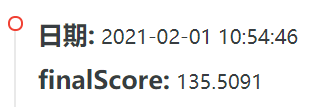